#📌 Extracción

In [13]:
import pandas as pd

In [14]:
datos_telecom = pd.read_json("TelecomX_Data.json")

In [42]:
with open("/content/TelecomX_diccionario.md", 'r') as f:
    file_content = f.read()

print(file_content)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

#🔧 Transformación

In [19]:
phone_df = pd.json_normalize(datos_telecom['phone'])
internet_df = pd.json_normalize(datos_telecom['internet'])
account_df = pd.json_normalize(datos_telecom['account'])

# Concatenate all the dataframes
dftelecom= pd.concat([datos_telecom[['customerID', 'Churn']], Customer, phone_df, internet_df, account_df], axis=1)

#📊 Carga y análisis

In [27]:
dftelecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [29]:
dftelecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [73]:
dftelecom['Churn'] = dftelecom['Churn'].map({'0': False, '1': True})
display(dftelecom['Churn'].head())

,Churn
0,False
1,False
2,True
3,True
4,True


In [71]:
print(pd.unique(dftelecom['Charges.Total']))

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


#📄Informe final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

# Task
Analyze the dataset `dftelecom` to identify and correct data issues, including changing the data type of relevant columns to float and the 'Churn' column to boolean. Then, perform an exploratory data analysis (EDA) to understand the data characteristics and relationships with churn. Specifically, analyze churn distribution, explore numerical and categorical features, and investigate relationships between features and churn. Use the file "/content/TelecomX_diccionario.md" for reference.

## Analyze churn distribution

### Subtask:
Calculate and visualize the proportion of churned vs. non-churned customers to understand the class imbalance.


**Reasoning**:
Calculate and visualize the proportion of churned vs. non-churned customers.



Churn Distribution:
Churn
False    0.711986
True     0.288014
Name: proportion, dtype: float64


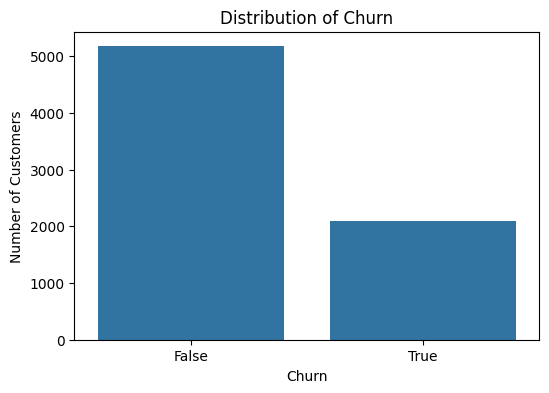

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts and normalize
churn_distribution = dftelecom['Churn'].value_counts(normalize=True)

# Print the normalized churn distribution
print("Churn Distribution:")
print(churn_distribution)

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=dftelecom)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

## Explore numerical features

### Subtask:
Visualize the distributions of numerical features like `tenure`, `Charges.Monthly`, and `Charges.Total` for churned and non-churned customers.


**Reasoning**:
Generate histograms for the numerical features to visualize their distributions for churned and non-churned customers.



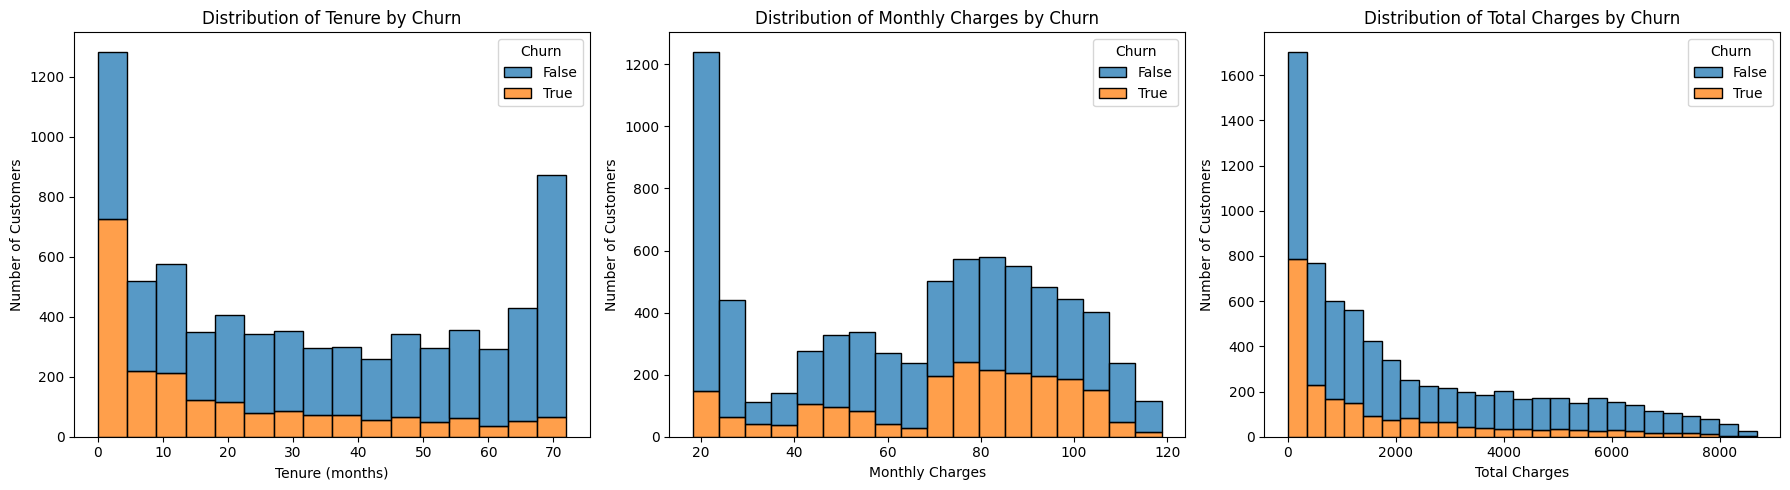

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=dftelecom, x='tenure', hue='Churn', ax=axes[0], multiple='stack')
axes[0].set_title('Distribution of Tenure by Churn')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Number of Customers')

sns.histplot(data=dftelecom, x='Charges.Monthly', hue='Churn', ax=axes[1], multiple='stack')
axes[1].set_title('Distribution of Monthly Charges by Churn')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('Number of Customers')

sns.histplot(data=dftelecom, x='Charges.Total', hue='Churn', ax=axes[2], multiple='stack')
axes[2].set_title('Distribution of Total Charges by Churn')
axes[2].set_xlabel('Total Charges')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

## Explore categorical features

### Subtask:
Analyze the relationship between categorical features and churn using count plots or other visualizations.


**Reasoning**:
Identify the categorical columns and iterate through them to create count plots showing the relationship with churn.



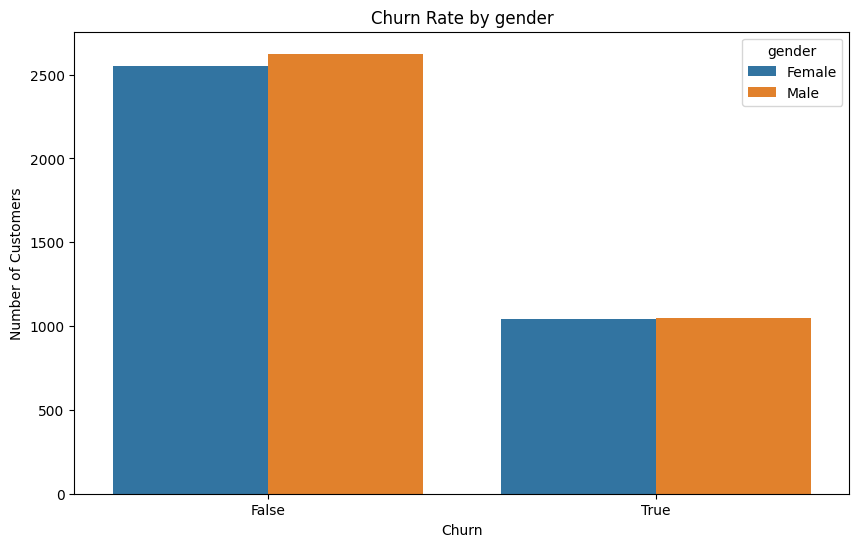

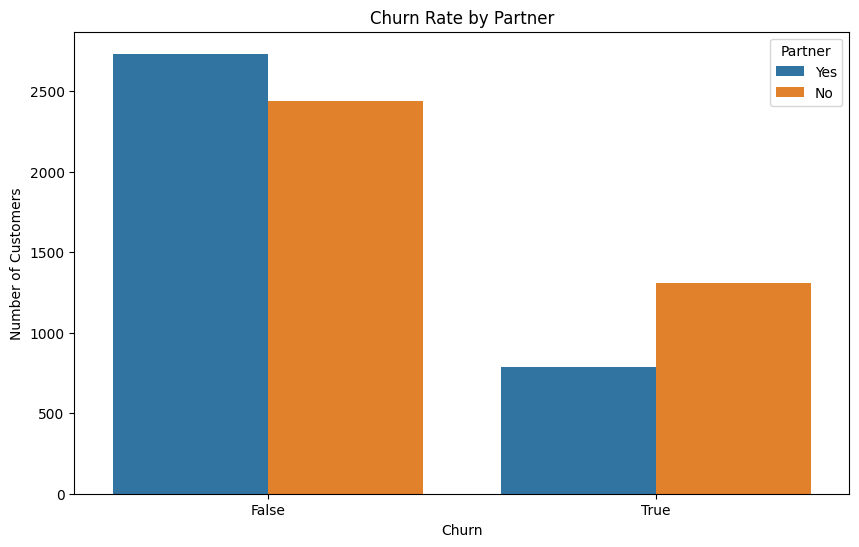

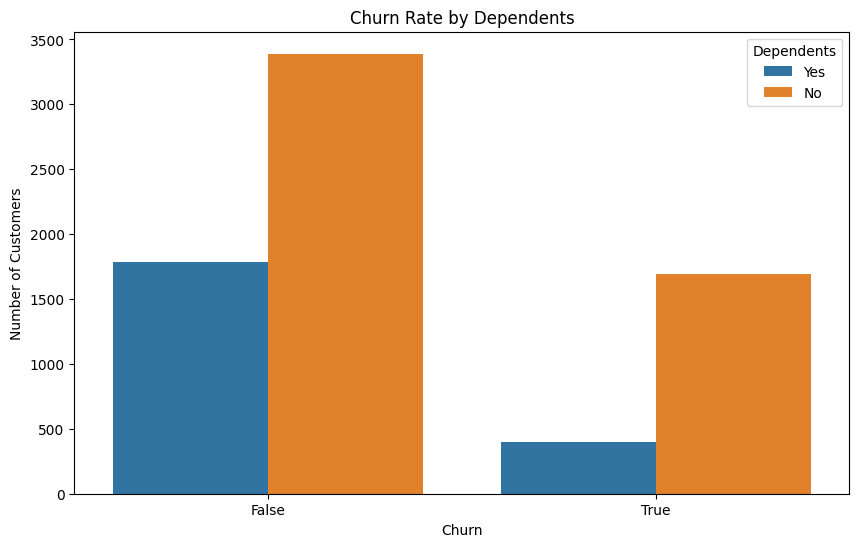

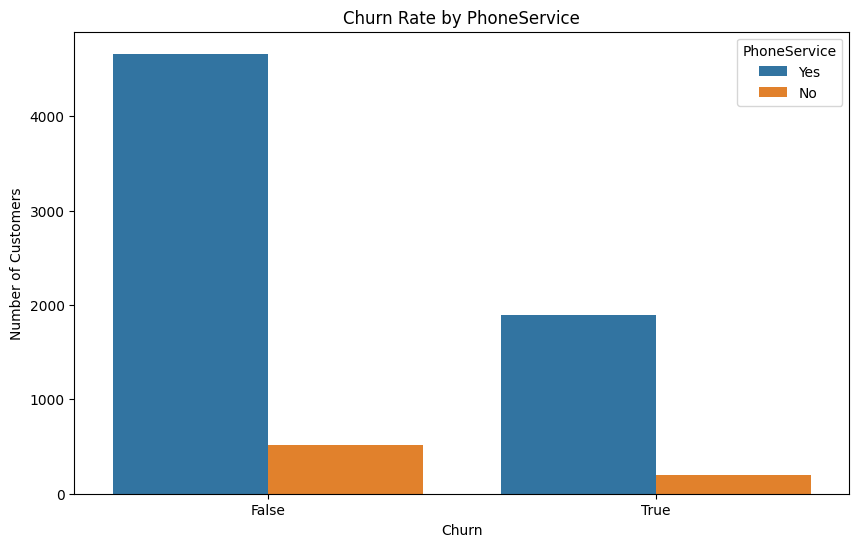

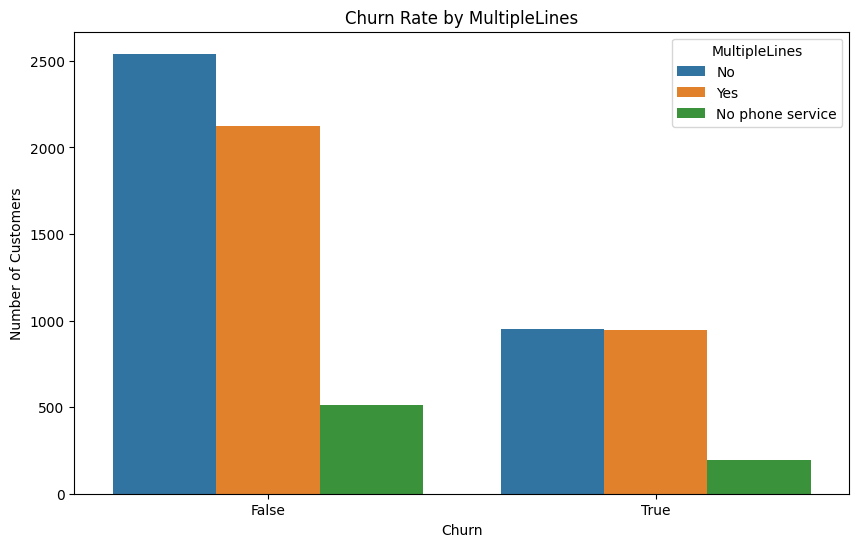

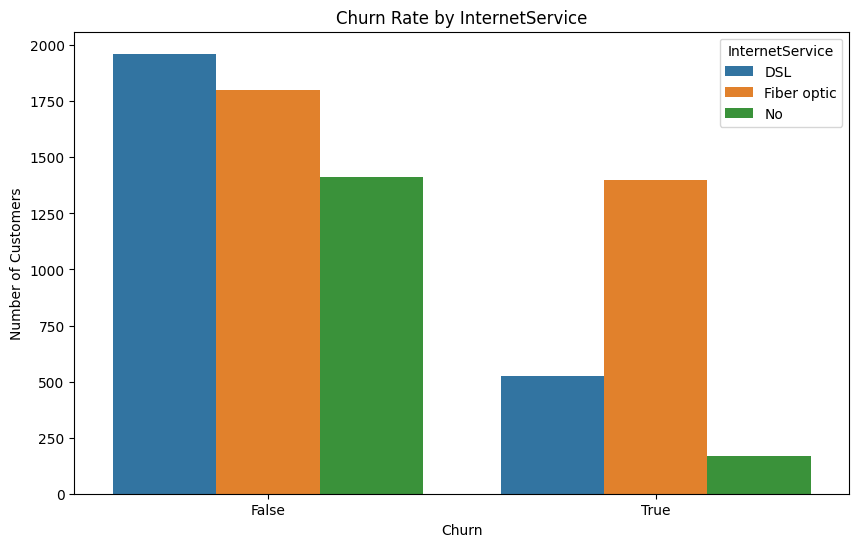

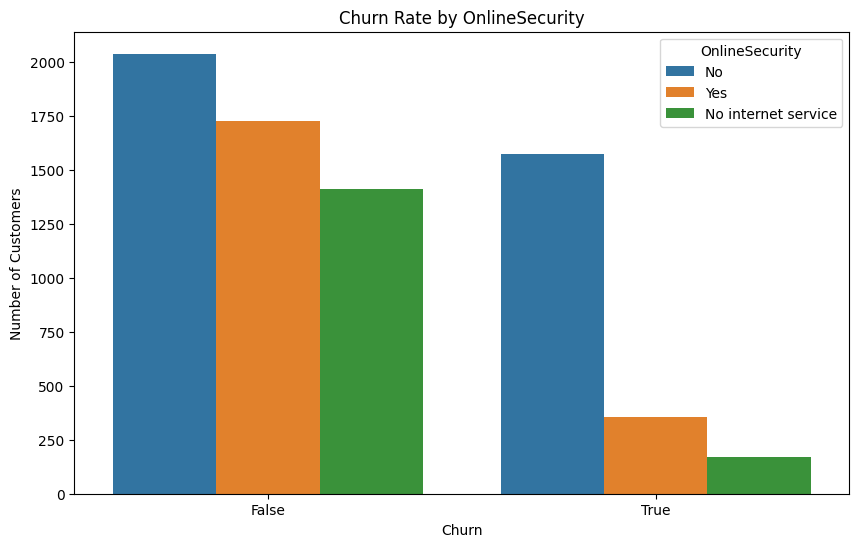

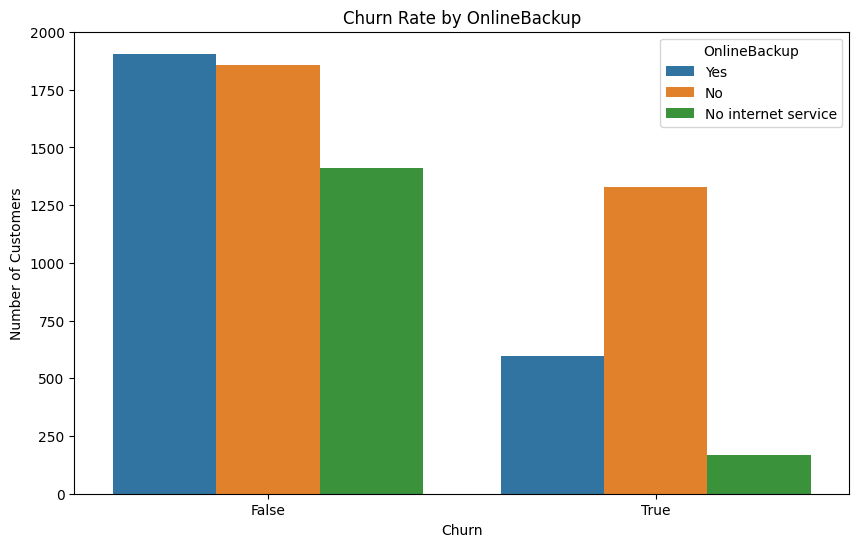

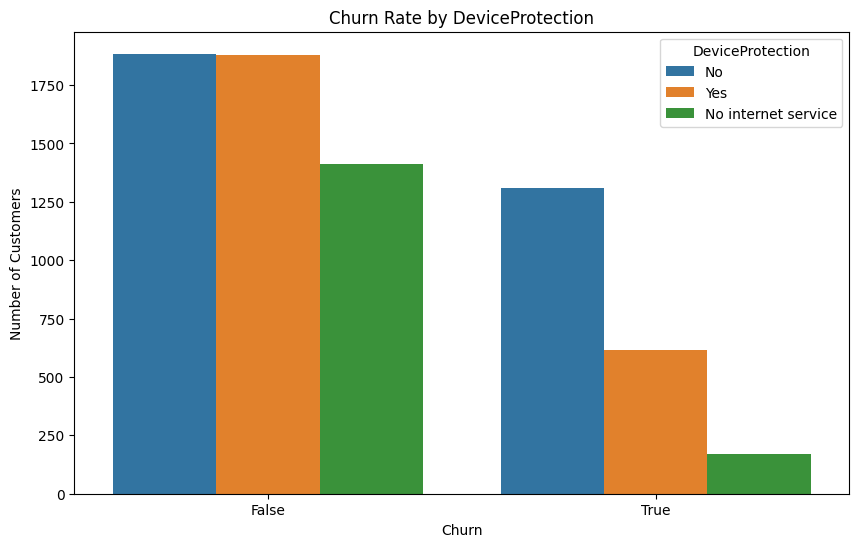

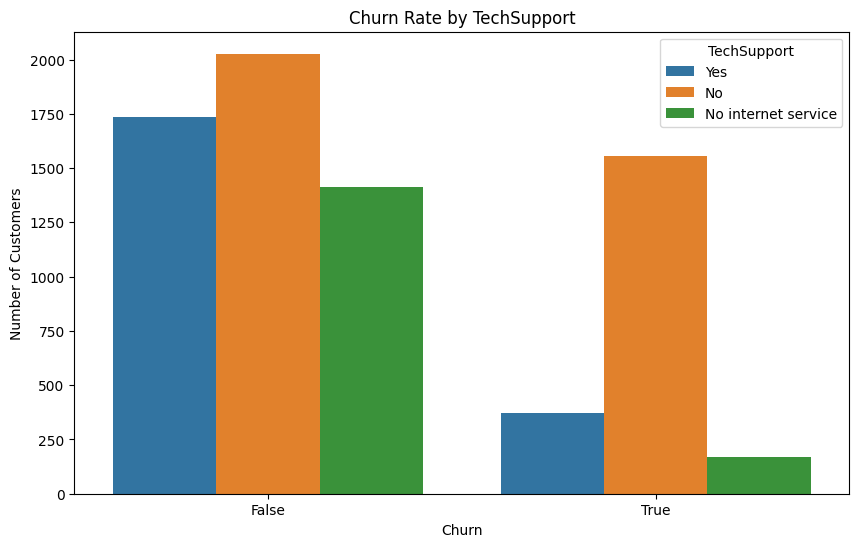

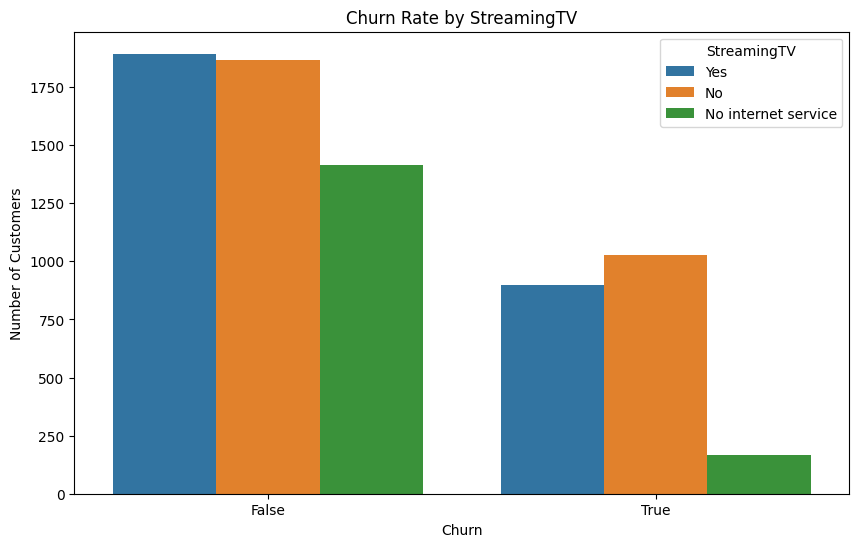

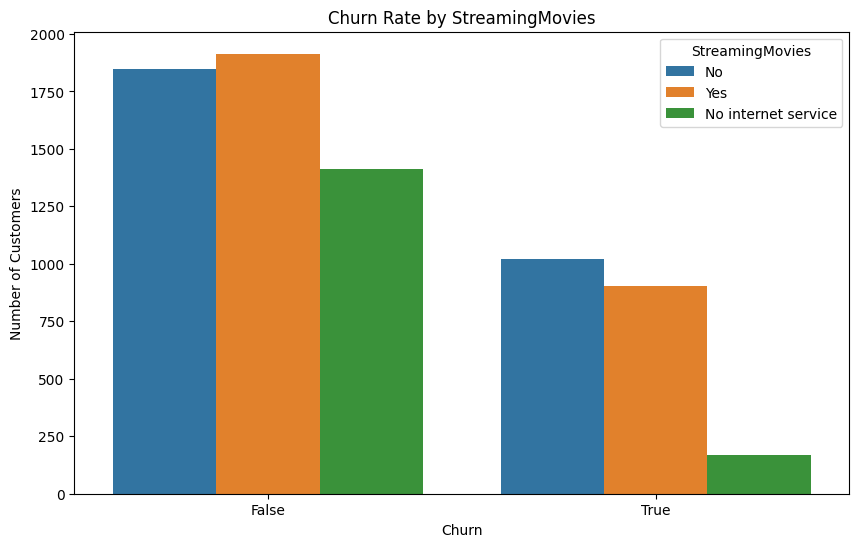

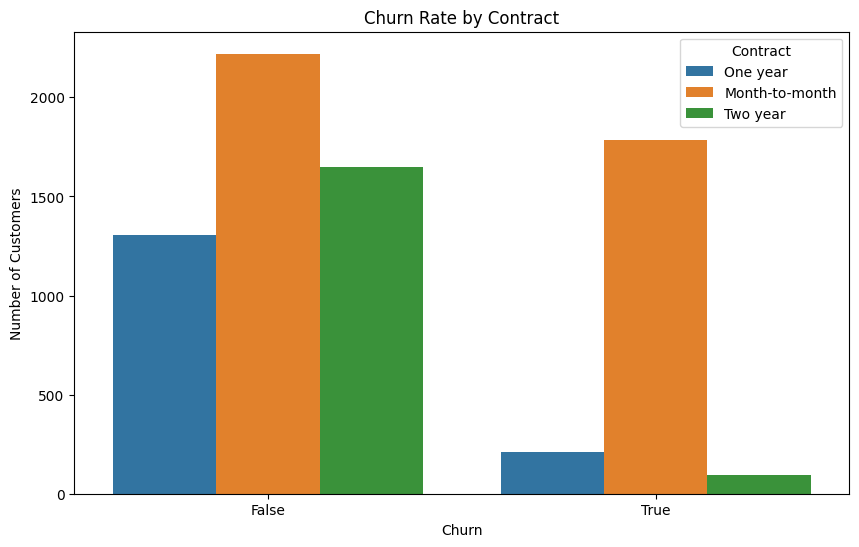

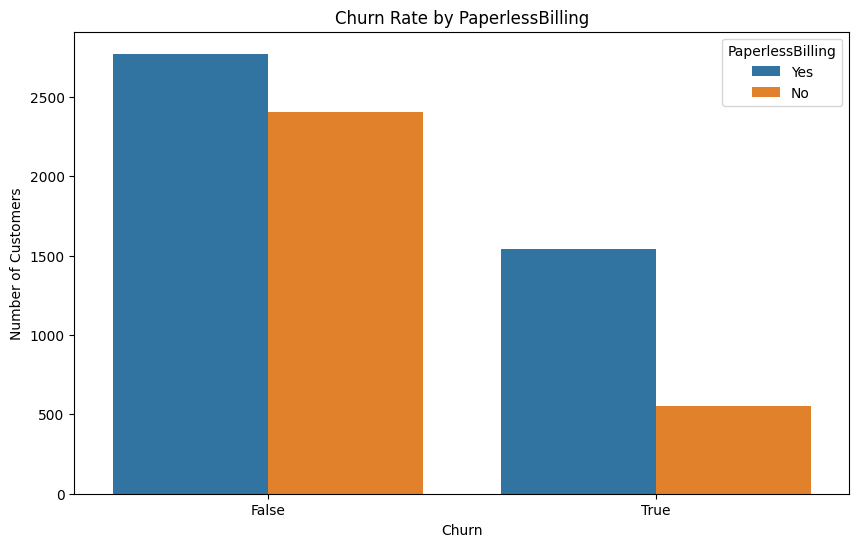

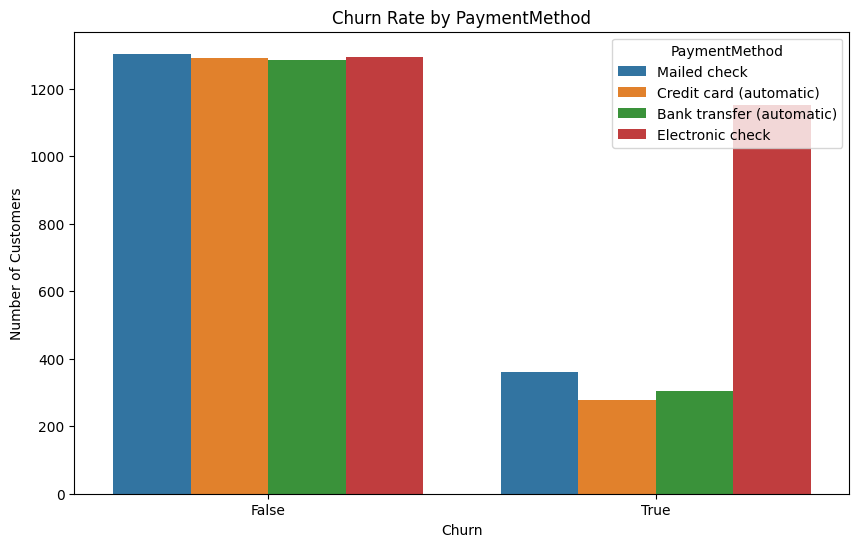

In [76]:
# Identify categorical columns, excluding 'customerID' and 'Churn'
categorical_cols = dftelecom.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
# Assuming 'Churn' has already been converted to boolean and is not an object type anymore.
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')


# Iterate through categorical columns and create count plots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dftelecom, x='Churn', hue=col)
    plt.title(f'Churn Rate by {col}')
    plt.xlabel('Churn')
    plt.ylabel('Number of Customers')
    plt.show()

## Investigate relationships

### Subtask:
Explore relationships between different features and their impact on churn.


**Reasoning**:
Calculate the correlation matrix for the numerical columns and create a heatmap to visualize the relationships.



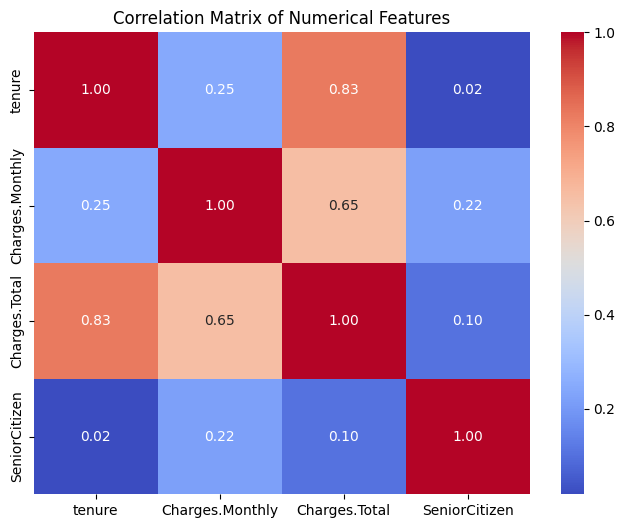

In [77]:
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'SeniorCitizen']
correlation_matrix = dftelecom[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
Create a stacked bar plot to visualize the relationship between 'tenure' and 'Churn', grouped by 'Contract' type.



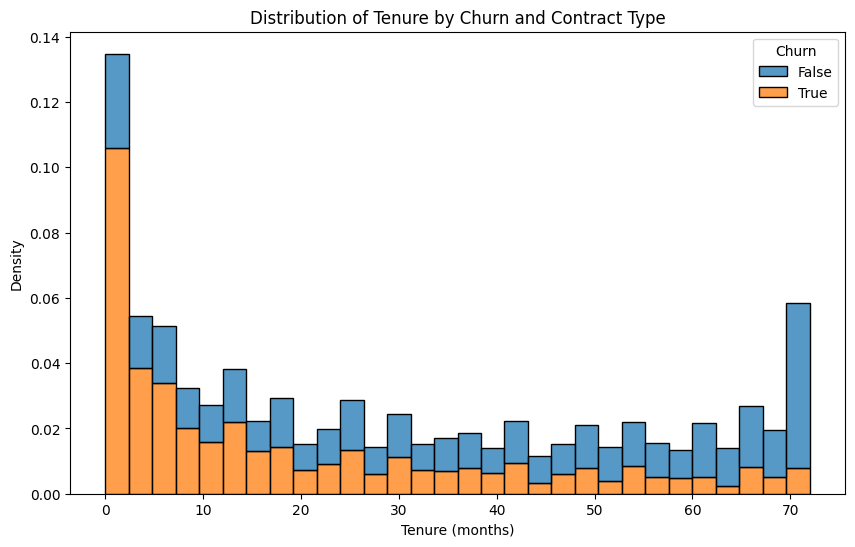

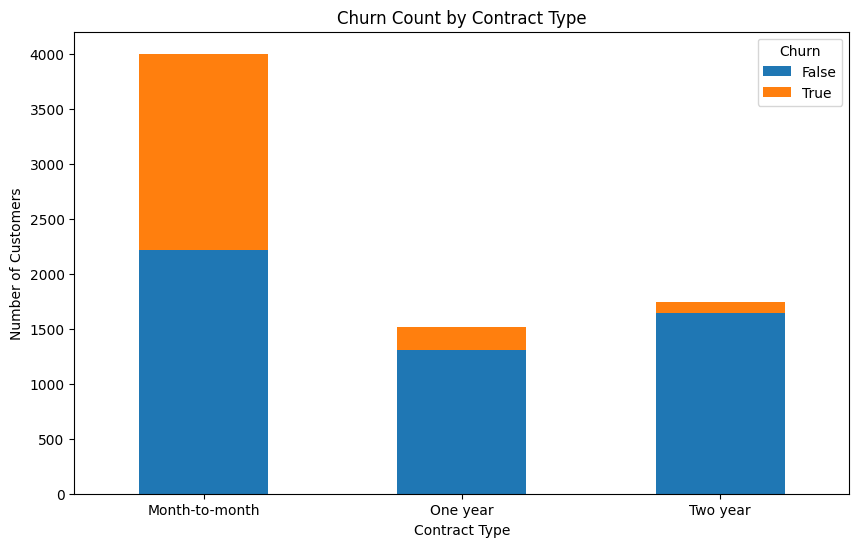

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dftelecom, x='tenure', hue='Churn', multiple='stack', stat='density', common_norm=False, bins=30)
plt.title('Distribution of Tenure by Churn and Contract Type')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.show()

# To visualize tenure and churn by contract type, we can create a pivot table and then plot.
contract_churn = dftelecom.groupby(['Contract', 'Churn'])['customerID'].count().unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

**Reasoning**:
Explore the relationship between internet service type, online security, tech support, and churn using grouped bar plots.



Churn count by InternetService, OnlineSecurity, and TechSupport:


Churn                                                    False  True 
InternetService OnlineSecurity      TechSupport                      
DSL             No                  No                     509    305
                                    Yes                    385     80
                Yes                 No                     389     77
                                    Yes                    679     64
Fiber optic     No                  No                     794   1028
                                    Yes                    349    158
                Yes                 No                     335    145
                                    Yes                    321     68
No              No internet service No internet service   1413    168

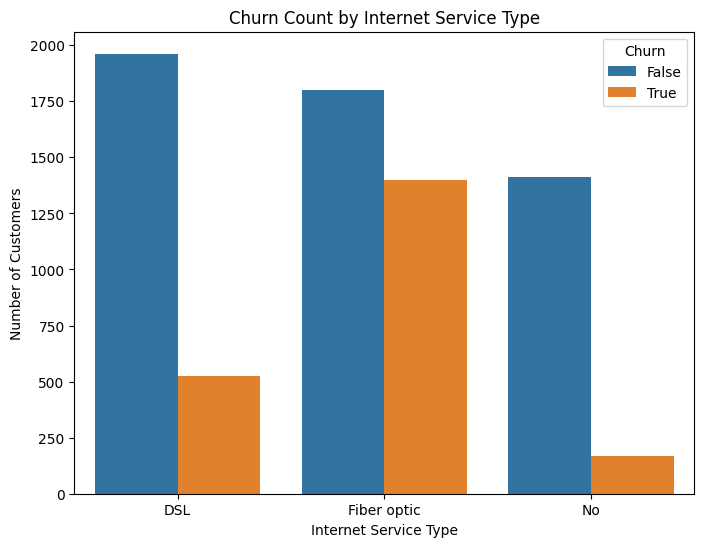

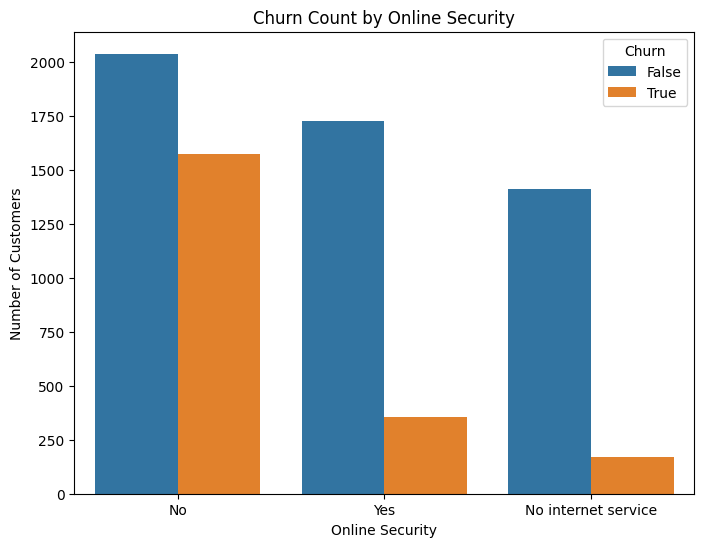

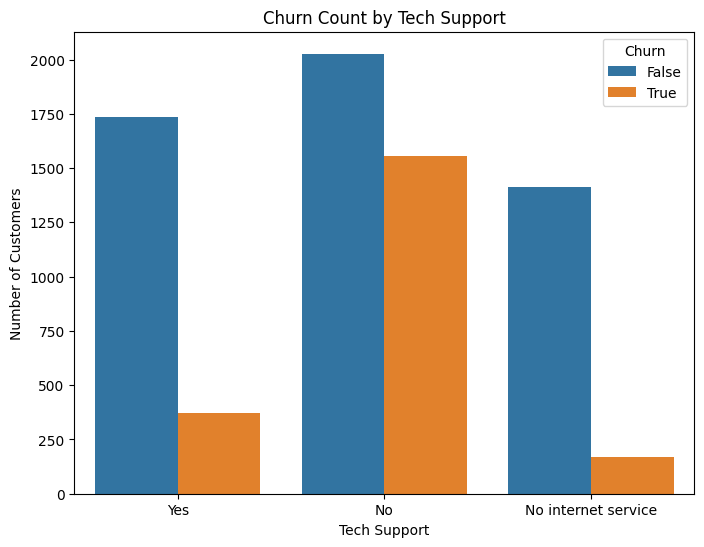

In [79]:
internet_security_tech_churn = dftelecom.groupby(['InternetService', 'OnlineSecurity', 'TechSupport', 'Churn'])['customerID'].count().unstack().fillna(0)
print("Churn count by InternetService, OnlineSecurity, and TechSupport:")
display(internet_security_tech_churn)

# Visualize the relationship between InternetService and Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=dftelecom, x='InternetService', hue='Churn')
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

# Visualize the relationship between OnlineSecurity and Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=dftelecom, x='OnlineSecurity', hue='Churn')
plt.title('Churn Count by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.show()

# Visualize the relationship between TechSupport and Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=dftelecom, x='TechSupport', hue='Churn')
plt.title('Churn Count by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.show()

**Reasoning**:
Investigate the relationship between 'Charges.Monthly' and 'PaymentMethod' and their impact on churn using box plots.



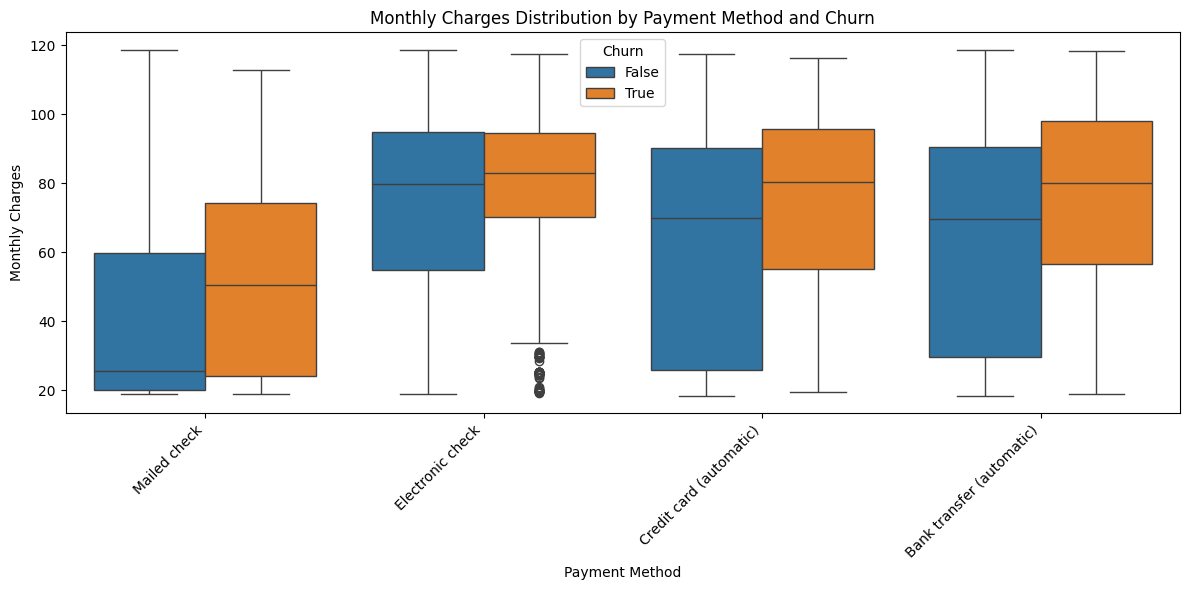

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dftelecom, x='PaymentMethod', y='Charges.Monthly', hue='Churn')
plt.title('Monthly Charges Distribution by Payment Method and Churn')
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Consider other potentially interesting feature combinations and their relationships with churn and create visualizations accordingly. We will examine the relationship between InternetService, StreamingTV, StreamingMovies and Churn.



Churn count by InternetService, StreamingTV, and StreamingMovies:


Churn                                                    False  True 
InternetService StreamingTV         StreamingMovies                  
DSL             No                  No                     840    305
                                    Yes                    292     67
                Yes                 No                     278     61
                                    Yes                    552     93
Fiber optic     No                  No                     483    448
                                    Yes                    253    208
                Yes                 No                     246    209
                                    Yes                    817    534
No              No internet service No internet service   1413    168

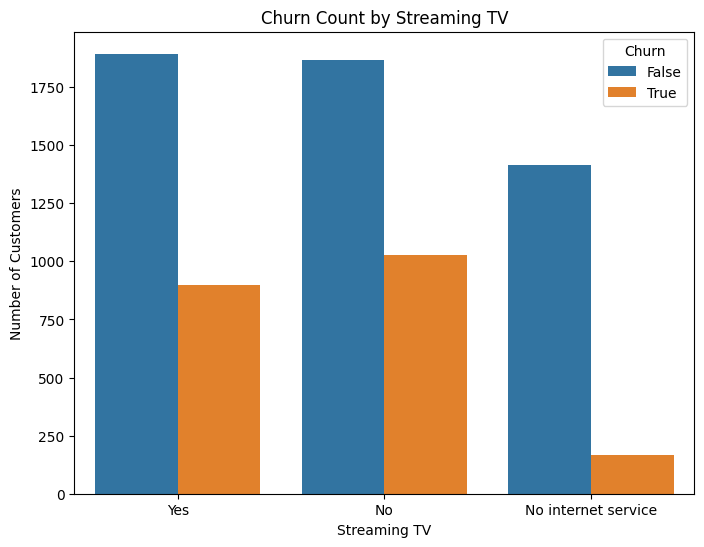

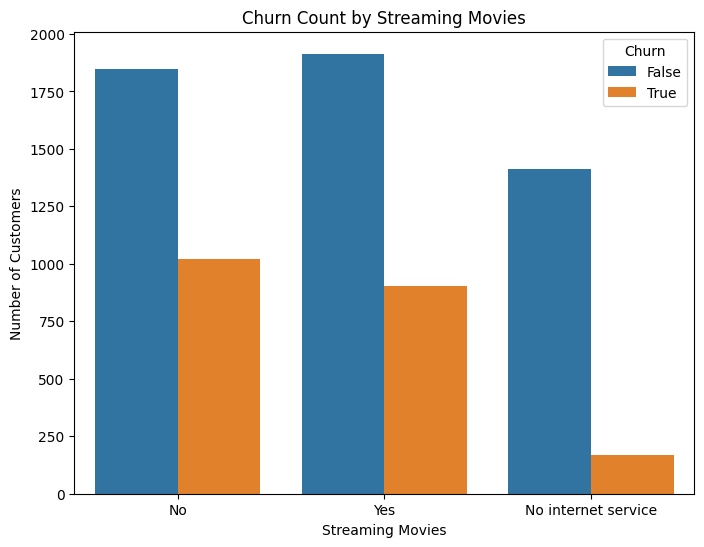

In [81]:
internet_streaming_churn = dftelecom.groupby(['InternetService', 'StreamingTV', 'StreamingMovies', 'Churn'])['customerID'].count().unstack().fillna(0)
print("Churn count by InternetService, StreamingTV, and StreamingMovies:")
display(internet_streaming_churn)

# Visualize the relationship between InternetService and Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=dftelecom, x='StreamingTV', hue='Churn')
plt.title('Churn Count by Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Number of Customers')
plt.show()

# Visualize the relationship between OnlineSecurity and Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=dftelecom, x='StreamingMovies', hue='Churn')
plt.title('Churn Count by Streaming Movies')
plt.xlabel('Streaming Movies')
plt.ylabel('Number of Customers')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Approximately 71.2% of customers did not churn, while 28.8% churned, indicating a class imbalance in the dataset.
*   Customers with shorter tenure and higher monthly charges are more likely to churn.
*   Customers on month-to-month contracts have a significantly higher churn rate compared to those on one-year or two-year contracts.
*   Customers with Fiber optic internet service exhibit a higher churn rate than those with DSL or no internet service.
*   Customers who do not subscribe to Online Security or Tech Support services show a higher propensity to churn.
*   Customers who churned tend to have higher monthly charges, particularly those using electronic checks as a payment method.
*   There is a strong positive correlation between tenure and total charges.

### Insights or Next Steps

*   Focus on strategies to retain customers with shorter tenure and those on month-to-month contracts, potentially through incentives for longer-term commitments.
*   Investigate the reasons behind the high churn rate among Fiber optic internet users and those without security or tech support services to identify areas for service improvement or targeted interventions.
